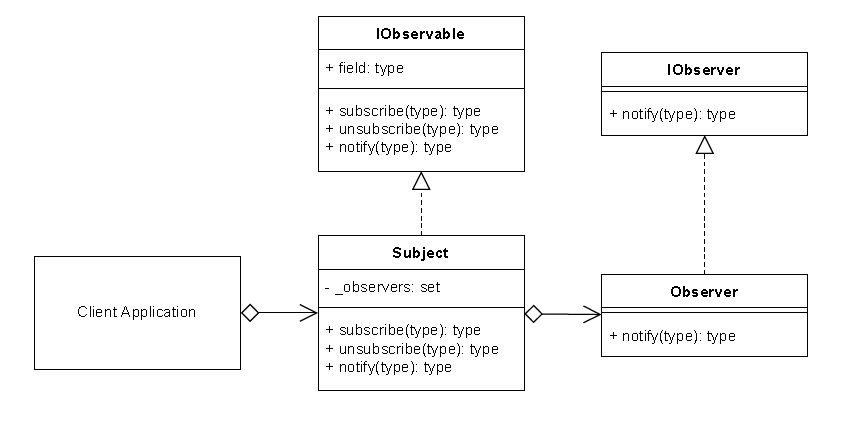

In [ ]:
from PIL import Image

Image.open("../Observer.png")

In [6]:
from abc import ABC, abstractmethod

class Subscriber(ABC):
    @staticmethod
    @abstractmethod
    def get_message(message):
        pass
    
class Publisher:
    def __init__(self):
        self.subscribers = set()
    
    def register(self,who:Subscriber):
        self.subscribers.add(who)
    
    def unregister(self,who:Subscriber):
        self.subscribers.remove(who)
    
    def dispatch(self,message):
        for subscriber in self.subscribers:
            subscriber.get_message(message)
            
            

class SubscriberA(Subscriber):
    def __init__(self,name:str)-> None:
        self.name =name
    
    def get_message(self,message):
        print(f"{self.name} got message '{message}' ")

class SubscriberB(Subscriber):
    def __init__(self,name:str)-> None:
        self.name =name
    
    def get_message(self,message):
        print(f"{self.name} got message '{message}' ")
        
class SubscriberC(Subscriber):
    def __init__(self,name:str)-> None:
        self.name =name
    
    def get_message(self,message):
        print(f"{self.name} got message '{message}' ")
        
pub = Publisher()
Ray = SubscriberA("Ray")
Migo = SubscriberB("Migo")

pub.register(Ray)
pub.register(Migo)

pub.dispatch("It's techtalk!")
        

Ray got message 'It's techtalk!' 
Migo got message 'It's techtalk!' 


In [7]:
class Subscriber(ABC):
    pass

class SubscriberOne(Subscriber):
    def __init__(self,name):
        self.name =name
    
    def update(self,message):
        print(f"{self.name} got message '{message}' ")
        
class SubscriberTwo(Subscriber):
    def __init__(self,name):
        self.name =name
    
    def receive(self,message):
        print(f"{self.name} got message '{message}' ")
        
class Publisher:
    def __init__(self):
        self.subscribers = dict()
    
    def register(self,who:Subscriber,callback=None):
        if callback is None:
            callback = getattr(who,"update")
        self.subscribers[who] = callback
        
    def unregister(self,who: Subscriber):
        del self.subscribers[who]
    
    def dispatch(self,message):
        for user,itsfunction in self.subscribers.items():
            itsfunction(message)
        

In [10]:
pub = Publisher()
Bob = SubscriberOne("Bob")
Ryan = SubscriberTwo("Ryan")
Migo = SubscriberOne("Migo")

pub.register(Bob,Bob.update)
pub.register(Ryan,Ryan.receive)
pub.register(Migo,Migo.update)

pub.dispatch("Hey, It's lunchtime!")
pub.unregister(Migo)

pub.dispatch("Hey, It's Dinner time!")


Bob got message 'Hey, It's lunchtime!' 
Ryan got message 'Hey, It's lunchtime!' 
Migo got message 'Hey, It's lunchtime!' 
Bob got message 'Hey, It's Dinner time!' 
Ryan got message 'Hey, It's Dinner time!' 
